In [ ]:
##### Transfrom .RDATA to .csv 

# import pyreadr
# result = pyreadr.read_r('/Users/eric/Desktop/NEW/TEP/TEP_FaultFree_Testing.RData') 
# # result is a dictionary where keys are the name of objects and the values python objects
# print(result.keys()) 
# df = result["fault_free_testing"] # extract the pandas data frame for object df1

# sample_columns = ['xmeas_1', 'xmeas_2',
#        'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7', 'xmeas_8',
#        'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13', 'xmeas_14',
#        'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19', 'xmeas_20',
#        'xmeas_21', 'xmeas_22','xmv_1', 'xmv_2', 'xmv_3', 'xmv_4','xmv_5', 'xmv_6', 
#                   'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10', 'xmv_11']
# df_sample = df[sample_columns] 

# # df_sample = df_sample.sample( n=1500,  random_state=1 )
# df_sample.to_csv('TE_DATASET/TEP_FaultFree_Testing.csv', index = None)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import  train_test_split

noise1 = np.random.laplace(0, 1, 3000)

x1 = np.random.normal(0,1,size=3000)
x2 = np.random.exponential(scale=1, size=3000)
x3 = np.random.weibull(1, 3000)

x5 = np.random.lognormal(0, 0.2, 3000)
x6 = np.random.chisquare(2,3000)

y = np.sinh(0.5*x1) + 1.5*np.exp(-1*(x2**2)) + np.exp(-1*x3) - 2 
x4 = np.log(1+(np.exp(1))) + (y-6)/45 - x5 - x6 

df = pd.DataFrame({'x1':x1,'x2':x2,'x3':x3,'x4':x4,'x5':x5,'x6':x6,'y':y})
df.to_csv('test.csv', index = None)

df.describe()

,x1,x2,x3,x4,x5,x6,y
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,-0.028908,9.841363e-01,1.009806,-1.896974,1.019253,2.042205,-0.695039
std,1.005341,9.790151e-01,0.997042,2.001655,0.210081,1.991497,0.856405
min,-3.424390,6.013968e-07,0.000579,-15.788301,0.457495,0.000365,-3.573509
25%,-0.703342,2.858194e-01,0.289361,-2.759130,0.867972,0.581020,-1.272973
50%,-0.024824,6.729094e-01,0.701385,-1.344574,1.001054,1.495964,-0.656952
75%,0.650625,1.351007e+00,1.425012,-0.450624,1.145780,2.878211,-0.097447
max,3.449198,7.565826e+00,8.648736,0.529047,2.132661,16.159220,2.507994


<AxesSubplot:>

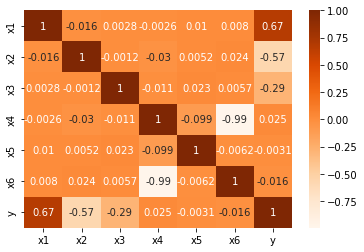

In [2]:
# Testing for MB (Parents, Children, Spouces) 

# y = df['xmeas_6']
# X =df[['xmv_1', 'xmv_2','xmv_3', 'xmeas_9', 'xmeas_8','xmv_10']]
# y = df['xmeas_15']
# X =df[['xmeas_16', 'xmeas_17','xmeas_18', 'xmv_4', 'xmv_7']]
# y = df['xmeas_11']
# X =df[['xmeas_12', 'xmeas_13','xmeas_14', 'xmeas_5', 'xmeas_22','xmv_5']]
# y = df['xmeas_9']
# X =df[['xmeas_6', 'xmeas_7','xmeas_8','xmv_10']]

import seaborn as sns

# df = pd.read_csv('TEP_FaultFree_Training_Sample.csv')
# df = df[['xmv_1', 'xmv_2','xmv_3', 'xmeas_9', 'xmeas_8','xmv_10','xmeas_6']]

#plt.scatter(df['xmeas_6'], df['xmv_2'])
corr = df.corr()
sns.heatmap(corr, cmap="Oranges", annot=True)

In [6]:
from sklearn.base import BaseEstimator, RegressorMixin
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold, train_test_split
from keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import BatchNormalization

import numpy as np
import pandas as pd 

import eli5
from eli5.sklearn import PermutationImportance

def load_data(filepath = 'TE_DATASET/', data = 'TEP_Faulty_Training.csv'):
    #file_path = filepath + data 
#     df = pd.read_csv(file_path)
#     df = df.sample(n=3000, random_state= seed, ignore_index=True)
#     # TEP_FaultFree_Testing, TEP_Faulty_Testing, TEP_Faulty_Training
#     df.to_csv('TEP_Faulty_Training_Sample.csv',index = None)

    df = pd.read_csv('TEP_Faulty_Training_Sample.csv')
    y = df['xmeas_6']
    X = df.drop(['xmeas_6'], axis = 1)
    # X = df[['xmeas_8', 'xmeas_9', 'xmv_1','xmv_2', 'xmv_3','xmv_10']] 
#     y = y.values
#     X = X.values
    return X,y 


class KerasModel(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        model = keras.Sequential([

        layers.Dense(512, activation='relu', input_shape=[32] ),
        layers.Dropout(0.2),
        layers.BatchNormalization(),

        layers.Dense(512, activation='relu'),
        layers.Dropout(0.2),
        layers.BatchNormalization(),

        layers.Dense(512, activation='relu'),
        layers.Dropout(0.2),
        layers.BatchNormalization(),

        layers.Dense(1) ])

        model.compile(loss='mse', optimizer='adam')

        model.fit(X, y, 
                  batch_size=256,
                  epochs= 200,
                  callbacks=[early_stopping],
                 )
        self.model = model
        return self

    def score(self, X, y):
        return mean_squared_error(y, self.model.predict(X) )
    
if __name__ == "__main__":
    
    seed = 3
    early_stopping = EarlyStopping(
    monitor= 'loss',
    min_delta= 0.01, 
    patience= 60, 
    restore_best_weights=True,
)
    X, y = load_data()
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.4, random_state= seed)
    model = KerasModel().fit(X_train, y_train)

perm = PermutationImportance(model, random_state=0).fit(X_val, y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist())

Epoch 1/200
8/8 [==============================] - 1s 46ms/step - loss: 1787.7961
Epoch 2/200
8/8 [==============================] - 0s 18ms/step - loss: 1765.7656
Epoch 3/200
8/8 [==============================] - 0s 18ms/step - loss: 1739.4338
Epoch 4/200
8/8 [==============================] - 0s 17ms/step - loss: 1706.5542
Epoch 5/200
8/8 [==============================] - 0s 16ms/step - loss: 1665.3756
Epoch 6/200
8/8 [==============================] - 0s 15ms/step - loss: 1615.1772
Epoch 7/200
8/8 [==============================] - 0s 15ms/step - loss: 1555.9536
Epoch 8/200
8/8 [==============================] - 0s 15ms/step - loss: 1487.3673
Epoch 9/200
8/8 [==============================] - 0s 17ms/step - loss: 1409.8197
Epoch 10/200
8/8 [==============================] - 0s 15ms/step - loss: 1324.1805
Epoch 11/200
8/8 [==============================] - 0s 15ms/step - loss: 1231.3853
Epoch 12/200
8/8 [==============================] - 0s 15ms/step - loss: 1132.0663
Epoch 13/200


8/8 [==============================] - 0s 14ms/step - loss: 0.2351
Epoch 103/200
8/8 [==============================] - 0s 13ms/step - loss: 0.2175
Epoch 104/200
8/8 [==============================] - 0s 13ms/step - loss: 0.2413
Epoch 105/200
8/8 [==============================] - 0s 13ms/step - loss: 0.3312
Epoch 106/200
8/8 [==============================] - 0s 13ms/step - loss: 0.3716
Epoch 107/200
8/8 [==============================] - 0s 13ms/step - loss: 0.2878
Epoch 108/200
8/8 [==============================] - 0s 13ms/step - loss: 0.3306
Epoch 109/200
8/8 [==============================] - 0s 13ms/step - loss: 0.2352
Epoch 110/200
8/8 [==============================] - 0s 13ms/step - loss: 0.2777
Epoch 111/200
8/8 [==============================] - 0s 13ms/step - loss: 0.2084
Epoch 112/200
8/8 [==============================] - 0s 13ms/step - loss: 0.2139
Epoch 113/200
8/8 [==============================] - 0s 13ms/step - loss: 0.2771
Epoch 114/200
8/8 [=======================

38/38 [==============================] - 0s 3ms/step


Weight,Feature
0.0023 ± 0.0011,xmv_3
0.0021 ± 0.0007,xmv_9
0.0004 ± 0.0001,xmeas_11
0.0004 ± 0.0000,xmv_11
0.0003 ± 0.0001,xmeas_22
0.0001 ± 0.0001,xmv_2
0.0000 ± 0.0000,xmv_7
0.0000 ± 0.0001,xmeas_18
0.0000 ± 0.0000,xmeas_15
0.0000 ± 0.0001,xmv_8


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error
from keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import BatchNormalization
from sklearn.preprocessing import StandardScaler

plt.rcParams["figure.figsize"] = [16,10]

seed_ = 23
tf.random.set_seed(seed_)
tf.keras.utils.set_random_seed(seed_)
tf.config.experimental.enable_op_determinism()

def load_data(filepath = 'TE_DATASET/', data = 'TEP_Faulty_Training.csv'):
    #file_path = filepath + data 
#     df = pd.read_csv(file_path)
#     df = df.sample(n=3000, random_state= seed, ignore_index=True)
#     # TEP_FaultFree_Testing, TEP_Faulty_Testing, TEP_Faulty_Training
#     df.to_csv('TEP_Faulty_Training_Sample.csv',index = None)

    df = pd.read_csv('TEP_Faulty_Training_Sample.csv')
    y = df['xmeas_6']
    # X = df.drop(['xmeas_6'], axis = 1)
    X = df[['xmeas_8', 'xmeas_9', 'xmv_1','xmv_2', 'xmv_3','xmv_10']] 
    y = y.values
    X = X.values
    return X,y 

def build_model():
    model = keras.Sequential([
        
    layers.Dense(units, activation='relu', input_shape=[6] ),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
        
    layers.Dense(units, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
        
    layers.Dense(units, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
        
    layers.Dense(1) ])
    
    model.compile(loss='mse', optimizer='adam')
    return model

def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test):
    
    early_stopping = EarlyStopping(
    monitor= 'loss',
    min_delta= 0.01, 
    patience= 60, 
    restore_best_weights=True,
        
)
    history = model.fit(X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=256,
    epochs= 200,
    callbacks=[early_stopping],
    verbose=0)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    history_df = pd.DataFrame(history.history)
    history_df.loc[:, ['loss', 'val_loss']].plot()
    return mse
  
if __name__ == "__main__":    
    seed = 12
    units = 256
    res = []
    #random.randint(0, 100)
    kf = KFold(n_splits = 10, random_state = seed, shuffle= True)
    X,y = load_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= seed)

    for i, (train_index, val_index) in enumerate( kf.split(X_train, y_train) ):
        model = None 
        model = build_model()
        mse = train_and_evaluate(model, X[train_index], y[train_index], X[val_index], y[val_index], X_test, y_test)
        res.append([i+1, mse])
        print(i+1, mse)
            
    df_res = pd.DataFrame(res, columns = ['Run', 'MSE'])
    #df_res.to_csv('res.csv', index = False)
    print(df_res['MSE'].mean())
    print(df_res['MSE'].std())

19/19 [==============================] - 0s 7ms/step
1 0.3421316289365448
19/19 [==============================] - 0s 7ms/step
2 0.720838277770217
19/19 [==============================] - 0s 8ms/step
3 5.624481855568157
19/19 [==============================] - 0s 7ms/step
4 2.7547554578415165
19/19 [==============================] - 0s 7ms/step
5 2.701447112311183
19/19 [==============================] - 0s 9ms/step
6 0.6481699408643434
19/19 [==============================] - 0s 9ms/step
7 3.9513859731154586


In [ ]:


perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

In [ ]:
# https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

# Underfitting occurs when the model is not able to obtain a sufficiently low error value on the training set.
# A plot of learning curves shows underfitting if:
#     The training loss remains flat regardless of training.
#     The training loss continues to decrease until the end of training.

# Overfitting refers to a model that has learned the training dataset too well, 
# including the statistical noise or random fluctuations in the training dataset.

# A plot of learning curves shows overfitting if:
#     The plot of training loss continues to decrease with experience.
#     The plot of validation loss decreases to a point and begins increasing again.

# A good fit is identified by a training and validation loss that decreases to a point of stability 
# with a minimal gap between the two final loss values.

# A plot of learning curves shows a good fit if:
#     The plot of training loss decreases to a point of stability.
#     The plot of validation loss decreases to a point of stability and has a small gap with the training loss.

# Unrepresentative Train Dataset
    # This situation can be identified by a learning curve for training loss that shows improvement 
    # and similarly a learning curve for validation loss that shows improvement, 
    # but a large gap remains between both curves.
    
# Unrepresentative Validation Dataset

# This case can be identified by a learning curve for training loss that looks like a good fit (or other fits) 
# and a learning curve for validation loss that shows noisy movements around the training loss.

# It may also be identified by a validation loss that is lower than the training loss. 
# In this case, it indicates that the validation dataset may be easier for the model 
# to predict than the training dataset.